In [ ]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
base_path = Path('/content/drive/MyDrive/DANE LEKCJA 1') # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

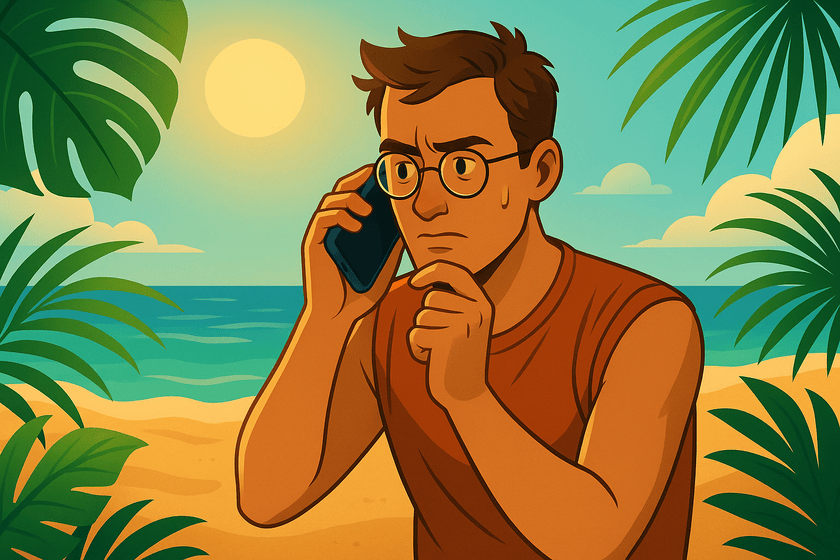

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania? ✅
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1) ✅
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3) ✅
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład) ✅
- Która zmienna oznacza predykowaną klasę? ✅
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1) ✅
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład) ✅

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1) ✅
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2) ✅
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3) ✅
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych ✅
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4) ✅
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków ✅

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [ ]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Zaporzyczyłem przydatne funkcje z notatek:

In [ ]:
def get_percentage_missing(df, axis):
  """
    Zwraca procent brakujących wartości (NaN) w wierszach lub kolumnach DataFrame.

    df : pandas.DataFrame
        Tabela danych, dla której liczone są braki.

    axis : int
        Oś, względem której obliczane są braki:
        - 0 : procent braków w każdej kolumnie
        - 1 : procent braków w każdym wierszu
  """
  missing_rows = df.isna().sum(axis=axis)
  missing_rows_perc = np.round(missing_rows / df.shape[axis] * 100, 2)
  return missing_rows_perc[missing_rows_perc > 0]

In [ ]:
def get_column_distribution(df, column):
  return df[column].value_counts(normalize=True)

In [ ]:
def plot_numeric_histogram(df, column_name):
    """
    Plots a histogram for the specified column in the DataFrame,
    and adds vertical lines for the mean and median.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
    Returns:
        None. Displays the histogram.
    """

    data = df[column_name].dropna()
    mean_val = data.mean()
    median_val = data.median()

    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=30, color='steelblue', edgecolor='black')
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_categorical_column(df, column_name):
    """
    Plots a bar chart for the specified categorical column.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the categorical column to plot.
    Returns:
        None. Displays the bar chart.
    """

    # count occurrences of each category
    counts = df[column_name].value_counts()

    plt.figure(figsize=(6, 4))
    counts.plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [ ]:
def boxplot(df, column_name):
    """
    Displays a boxplot of the choosen column to show its distribution.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the categorical column to plot.
    Returns:
        None. Displays the bar chart.
    """
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column_name].dropna(), color='lightgreen') # as you can see, you can use sns and plt at the same time
    plt.title(f'Distribution of {column_name} (boxplot)')
    plt.xlabel(column_name)

    plt.show()

In [ ]:
def scatterplot(df, column_name, y):
    """
    Plots a scatterplot between the chosen column and 'charges'.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot against 'charges'.
    Returns:
        None. Displays the scatterplot.
    """
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=column_name, y=y, color='darkorange', alpha=0.6)
    plt.title(f'{column_name} vs {y}')
    plt.xlabel(column_name)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_correlation_matrix(df):
    """
    Plots a heatmap showing the correlation matrix for numeric columns in the DataFrame.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing numeric data.
    Returns:
        None. Displays the correlation heatmap.
    """
    # compute correlation matrix only for numeric columns
    corr = df.corr(numeric_only=True)

    # fmt=".2f" rounds the number to 0.01
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

In [ ]:
def categorical_and_fare(df, categorical_column):

    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=categorical_column, y='Fare', palette='Set2')
    plt.title(f'Fare by {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel('Fare')
    plt.tight_layout()
    plt.show()

In [ ]:
def categorical_and_age(df, categorical_column):

    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=categorical_column, y='Age', palette='Set2')
    plt.title(f'Age by {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel('Age')
    plt.tight_layout()
    plt.show()

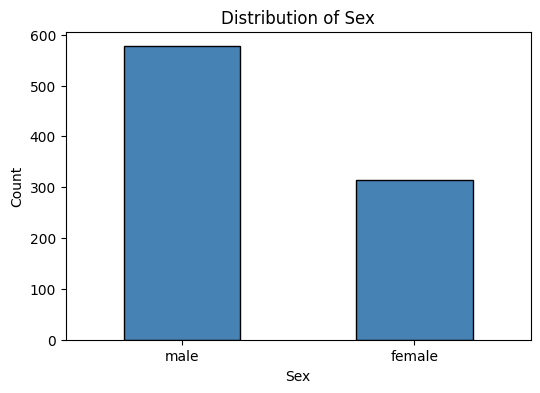

In [ ]:
plot_categorical_column(titanic_df, 'Sex')

Na statku znajdowało się prawie dwa razy więcej mężczyzn niż kobiet.

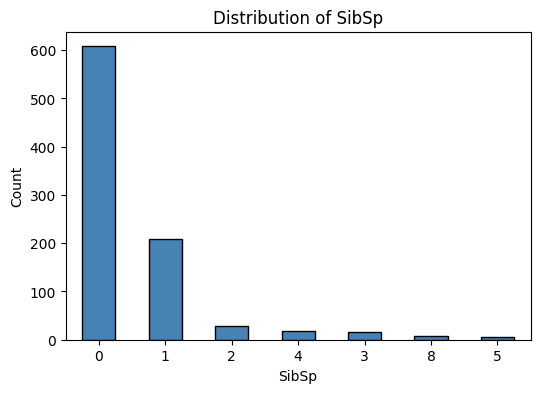

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [ ]:
plot_categorical_column(titanic_df, 'SibSp')
titanic_df['SibSp'].value_counts()

Widzimy, że większość pasażerów podróżowała sama lub z niewielką ilością rodzeństwa/małżonkiem. Występują outlierzy, jednak rozkład większości wartości pokazuje, że nie są one błędne i mają logiczny sens: dla 5 osób SibSp to 5 (zakładając, że wszystcy są spokrewnieni: każdy z nich ma 4 rodzeństwa i małzónka). Wartość SibSp 8 może być podejrzana ponieważ zaznaczyło ją 7 osób, co w najlepszym wypadku oznaczałoby że są one dla siebie rodzeństwem tj. każda z nich ma 6 rodzeństwa i wtedy jeszcze 2 małżonków lub rodzeństwo od innych rodziców (?).

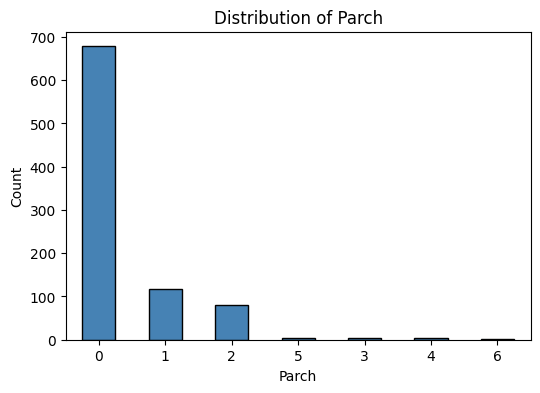

In [ ]:
plot_categorical_column(titanic_df, 'Parch')

Większość z pasażerów nie miała na pokładzie dzieci. Są jakieś wartości odstające, ale raczej wiarygodne, nie da się tutaj zweryfikować jak wyżej.

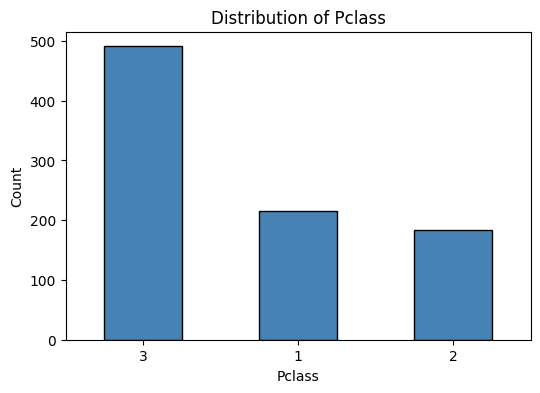

In [ ]:
plot_categorical_column(titanic_df, 'Pclass')

Dość spodziewany rezultat: większość pasażerów w III klasie.

Sprawdzam w jakich kategoriach występują puste wartości:

In [ ]:
missing_cols_mi = get_percentage_missing(titanic_df, axis=0)
missing_cols_mi

,0
Age,19.87
Fare,11.00
Cabin,77.10
Embarked,0.22


Aby nie zaburzać w sztuczny sposób rozkładu danych w kolumnach Cabin i Embarked, brakujące wartości uzupełniłem jako 'Unknown'.
W przypadku kolumn Age i Fare miałem większy dylemat: choć można zastąpić wartości NaN średnią, medianą lub wartościami zgodnymi z istniejącym rozkładem, takie podejście może prowadzić do zafałszowania wyników analizy. Na przykład, uzupełnienie wieku może sprawić, że pojawi się więcej młodych mężczyzn lub dzieci w III klasie niż było w rzeczywistości, co może wpłynąć na analizę zależności między płcią-wiekiem, klasą-wiekiem a przeżywalnością.
Z drugiej strony, usunięcie tych wierszy skutkuje utratą potencjalnie cennych informacji z pozostałych kolumn. Nie znalazłem idealnego rozwiązania, dlatego ostatecznie zdecydowałem się usupełnić Age zgodnie z istniejącym rozkładem, a Fare medianą dla danej klasy podróży (Pclass), ponieważ zależała ona od klasy (poniżej to sprawdziłem).

Nie wiem, czy słuszny dylema?

Zastępuje wartośći NaN w Cabin i Embarked wartościami 'Unknown':

In [ ]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('Unknown')
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('Unknown')

Zapisuję do zmiennej age_count_prob rozkład wieku:

In [ ]:
age_count_prob = get_column_distribution(titanic_df, 'Age')
age_count_prob

,proportion
Age,
24.00,0.042017
22.00,0.037815
18.00,0.036415
28.00,0.035014
30.00,0.035014
...,...
24.50,0.001401
0.67,0.001401
0.42,0.001401


Uzupełniam wartośći NaN w columnie Age na podstawie istniejącego rozkładu:

In [ ]:
age_values = age_count_prob.index
age_probs = age_count_prob.values
missing_age_vals = titanic_df.Age.isna()
titanic_df.loc[missing_age_vals, 'Age'] = np.random.choice(age_values, size=missing_age_vals.sum(), p=age_probs)

Sprawdzam jak zmienił się rozkład po uzupełnieniu:

In [ ]:
get_column_distribution(titanic_df, 'Age')

,proportion
Age,
24.00,0.040404
28.00,0.037037
18.00,0.037037
30.00,0.037037
19.00,0.034792
...,...
80.00,0.001122
24.50,0.001122
0.42,0.001122


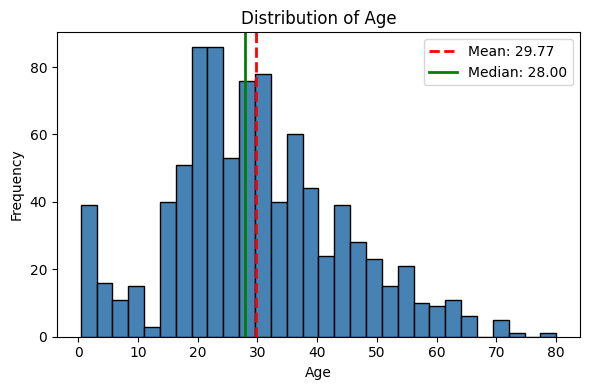

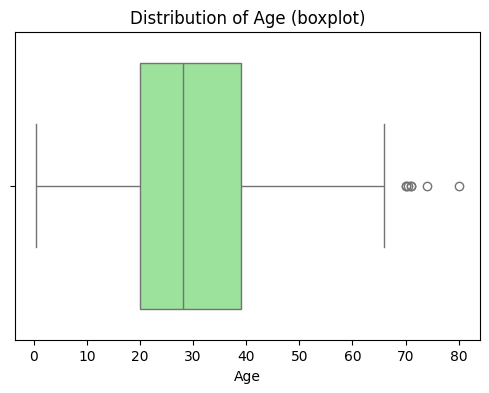

In [ ]:
plot_numeric_histogram(titanic_df, 'Age')
boxplot(titanic_df, 'Age')

Age posiada rozkład delikatnie prawoskośny, prawie normalny. Widzimy że posiadamy wartości odstające, które jednak przyjmują sensowane wartości jeżeli chodzi o wiek pasażera.

Sprawdzam czy cena biletu powiązana jest z klasą podróży oraz jaki jest rozkład ceny biletu w poszczególnych klasach:

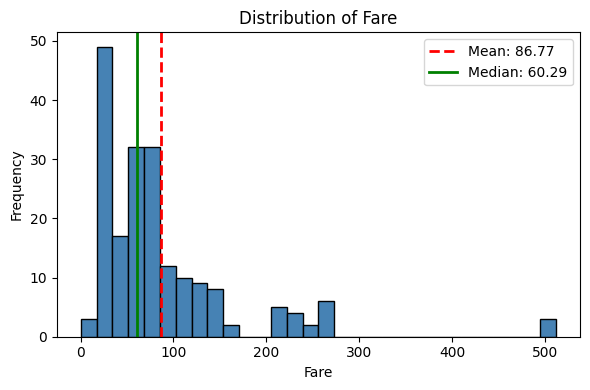

In [ ]:
plot_numeric_histogram(titanic_df[titanic_df['Pclass'] == 1], 'Fare')

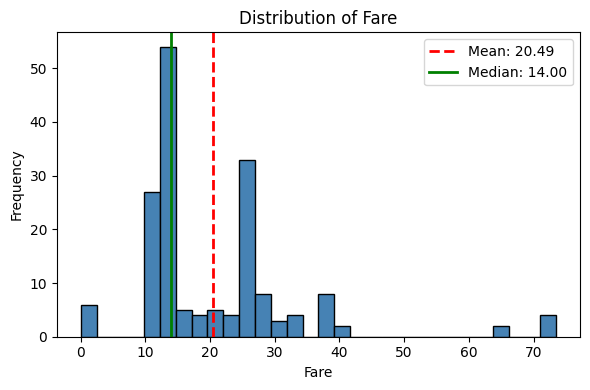

In [ ]:
plot_numeric_histogram(titanic_df[titanic_df['Pclass'] == 2], 'Fare')

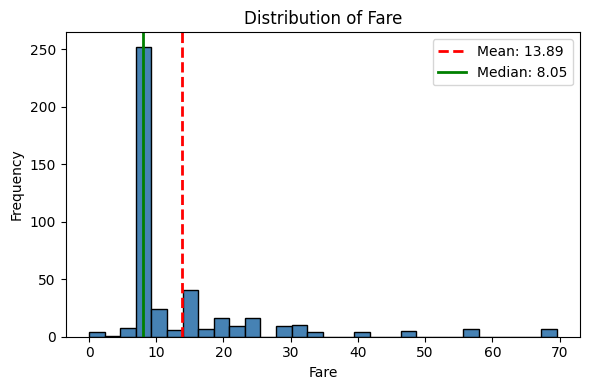

In [ ]:
plot_numeric_histogram(titanic_df[titanic_df['Pclass'] == 3], 'Fare')

Ponieważ rozkłady te są asymetryczne wartości usupełnię medianą dla danej klasy. Ma to przewagę nad średnią, ponieważ potencjalnie eliminuje wpływ bardzo drogich ekskluzynych kabin (lub przeciwnie bardzo tanich) o możliwie ograniczonej liczbie. Ponieważ możnabyło się spodziewać jakieś zależności pomiędzy ceną biletu, a klasą rozdzieliłem to na klasy.

In [ ]:
titanic_df.groupby('Pclass')['Fare'].median()

,Fare
Pclass,
1,60.2875
2,14.0000
3,8.0500


In [ ]:
titanic_df['Fare'] = titanic_df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

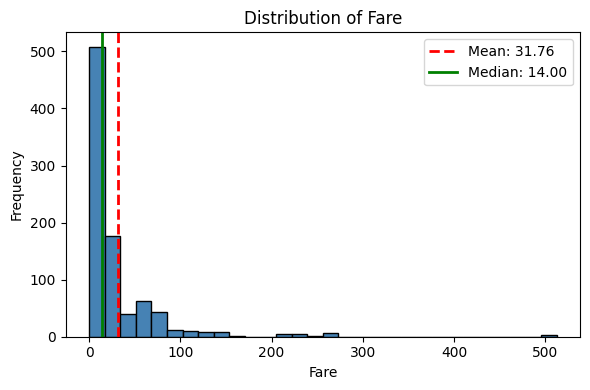

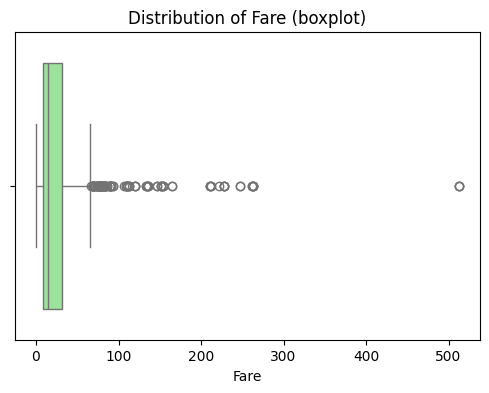

In [ ]:
plot_numeric_histogram(titanic_df, 'Fare')
boxplot(titanic_df, 'Fare')

Fare posiada zdecydowanie rozkład prawoskośny, z bardzo dużym skupieniem wartości w okolicy średniej oraz długim ogonem na którym widzimy pojawiające się wartości cen biletów dla III klasy wyraźnie oddzielone od reszty. Outlierzy są zdecydowanie widoczni, momentami ekstremalni, jednak można przyjąć że cena biletu mogła wachać się w znaczny sposób w zależności od kabiny.

Uzywam dedykowanej funkcji convert_dtypes() do podania typów danych:

In [ ]:
titanic_df = titanic_df.convert_dtypes()
titanic_df.dtypes

,0
Survived,Int64
Pclass,Int64
Name,string[python]
Sex,string[python]
Age,Float64
SibSp,Int64
Parch,Int64
Ticket,string[python]
Fare,Float64
Cabin,string[python]


Zmieniam typ danych Age na Int64:

In [ ]:
titanic_df['Age'] = titanic_df['Age'].astype('Int64')
titanic_df.dtypes

,0
Survived,Int64
Pclass,Int64
Name,string[python]
Sex,string[python]
Age,Int64
SibSp,Int64
Parch,Int64
Ticket,string[python]
Fare,Float64
Cabin,string[python]


Postanowiłem dodać dwie dodatkowe kolumny: Po pierwsze AgeGroup, które podzieli pasażerów na kategorie wiekowe. Po drugie Layer, które przypożądkuje warstwę pokładu ("piętro") na której znajdowała się kabina pasażera:

In [ ]:
bins = [0, 18, 60, titanic_df['Age'].max()]
labels = ['Child', 'Adult', 'Senior']

AgeGroup = pd.cut(titanic_df['Age'], bins=bins, labels=labels, right=False)
titanic_df['AgeGroup'] = AgeGroup

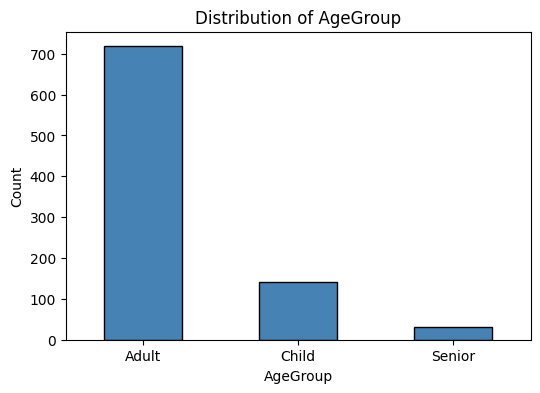

In [ ]:
plot_categorical_column(titanic_df, 'AgeGroup')

In [ ]:
print(titanic_df['Parch'].value_counts())
print(titanic_df['AgeGroup'].value_counts())

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: Int64
AgeGroup
Adult     718
Child     142
Senior     30
Name: count, dtype: int64


Liczba dzieci z rodzicami na pokładzie przekracza znacznie liczbę pasażerów w wieku 0-17 (AgeGrpup == 0), z czego wynika, że znaczna część osób pazażerów w wieku 18+ znajdowała się na pokładzie z rodzicami.

In [ ]:
titanic_df['Layer'] = titanic_df['Cabin'].str[0]

unknown_layer_loc = titanic_df['Layer'] == 'U'
titanic_df.loc[unknown_layer_loc, 'Layer'] = np.nan

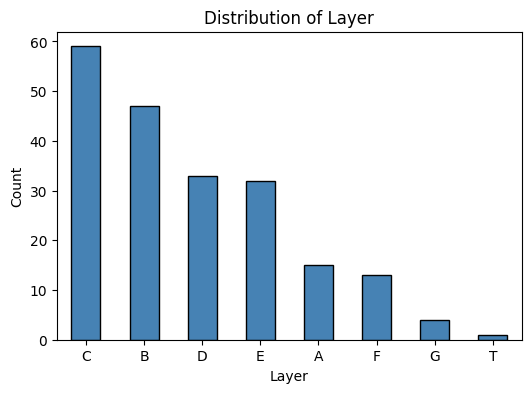

In [ ]:
plot_categorical_column(titanic_df, 'Layer')

Widzimy, że większość pasażerów znajdowała się gdzieś po środku pokładu, z niewielką ilością pasażerów skrajnie wysoko bądź nisko.

Pora na kodowanie cech kategorialnych:


*   Name - kategoria nieistotna w kontekście zadania
*   Sex - kodowanie one-hot encoding (zmienna bez porządku)
*   Ticket - kategoria nieistotna w kontekście zadania
*   Cabin - kategoria nieistotna w kontekście zadania (została dodana nowa kategoria Layer pełniąca leprze zadanie w kontekście przewidywania przeżycia, ponieważ nie wiem gdzie konkretne kabiny się znajdowały poza poziomem na którym były)
*   Embarked - kodowanie one-hot encoding (zmienna bez porządku)
*   AgeGroup - kodowanie ordinal (istnieje porządek pomiędzy wartościami, ze względu na roznący wiek w poszczególnych kategoriach)
*   Layer - kodowanie ordinal (istnieje porządek pomiędzy wartościami, ze względu na ułożenie warstw w rozkładzie statku: T-najwyższa, potem od A do G od najwyżejszej do najniższej)

In [ ]:
titanic_df = pd.get_dummies(data=titanic_df, prefix='Sex', columns=['Sex'], dtype=np.int32)

In [ ]:
titanic_df = pd.get_dummies(data=titanic_df, prefix='Embarked', columns=['Embarked'], dtype=np.int32)
titanic_df = titanic_df.drop('Embarked_Unknown', axis=1)

In [ ]:
mapping_agegroup = {
    'Child': 0,
    'Adult': 1,
    'Senior': 2
}

titanic_df['AgeGroup'] = titanic_df['AgeGroup'].map(mapping_agegroup).astype('float64')

In [ ]:
mapping_layer = {
    'T': 7,
    'A': 6,
    'B': 5,
    'C': 4,
    'D': 3,
    'E': 2,
    'F': 1,
    'G': 0,
}

titanic_df['Layer'] = titanic_df['Layer'].map(mapping_layer)

Wygenerowałem sobie wartości NaN w nowej kategorii, więc muszę się ich pozbyć. Wybrałem uzupełnianie według isteniejącego rozkładu.

Zapisuję do zmiennej layer_count_prob rozkład poziomu na pokładzie:

In [ ]:
layer_count_prob = get_column_distribution(titanic_df, 'Layer')
layer_count_prob

,proportion
Layer,
4.0,0.289216
5.0,0.230392
3.0,0.161765
2.0,0.156863
6.0,0.073529
1.0,0.063725
0.0,0.019608
7.0,0.004902


Uzupełniam wartośći NaN w columnie Age na podstawie istniejącego rozkładu:

In [ ]:
layer_values = layer_count_prob.index
layer_probs = layer_count_prob.values
missing_layer_vals = titanic_df.Layer.isna()
titanic_df.loc[missing_layer_vals, 'Layer'] = np.random.choice(layer_values, size=missing_layer_vals.sum(), p=layer_probs)

Sprawdzam jak zmienił się rozkład po uzupełnieniu:

In [ ]:
get_column_distribution(titanic_df, 'Layer')

,proportion
Layer,
4.0,0.278339
5.0,0.228956
3.0,0.164983
2.0,0.143659
6.0,0.081930
1.0,0.081930
0.0,0.016835
7.0,0.003367


Końcowy DataFrame:

In [ ]:
titanic_df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,AgeGroup,Layer,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.25,Unknown,1.0,1.0,0,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C85,1.0,4.0,1,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.925,Unknown,1.0,6.0,1,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1,C123,1.0,4.0,1,0,0,0,1
5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.05,Unknown,1.0,2.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",27,0,0,211536,13.0,Unknown,1.0,2.0,0,1,0,0,1
888,1,1,"Graham, Miss. Margaret Edith",19,0,0,112053,30.0,B42,1.0,5.0,1,0,0,0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",24,1,2,W./C. 6607,23.45,Unknown,1.0,3.0,1,0,0,0,1


Badanie zależności pomiędzy zmiennymi:

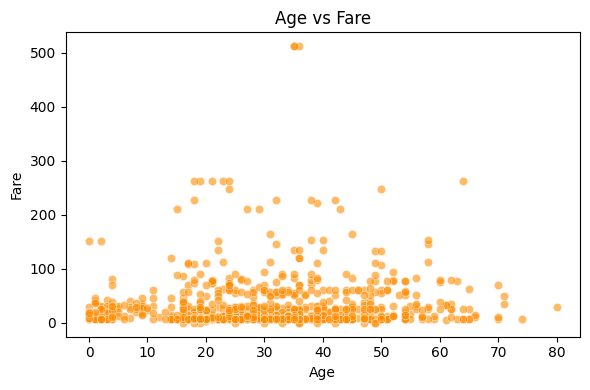

In [ ]:
scatterplot(titanic_df, 'Age', 'Fare')

Nie widać wpływu wieku na cenę biletu.

/tmp/ipython-input-2015224039.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=categorical_column, y='Age', palette='Set2')


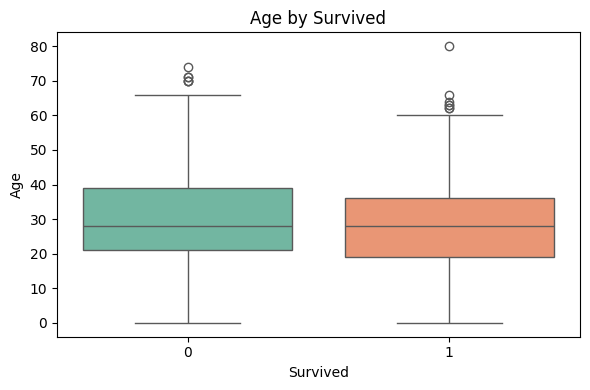

In [ ]:
categorical_and_age(titanic_df, 'Survived')

Możemy zaobserwować, że mediana wieku dla osób, które przeżyły i nie jest dość podobna, jednak oba kwadryle wraz z maksimum znajdują się niżej, w przypadku osób, które przeżyły, co może sugerować, że wiek ma wpływ na przeżywalność (młodsze osoby -> większe szanse przeżycia)

/tmp/ipython-input-292972300.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=categorical_column, y='Fare', palette='Set2')


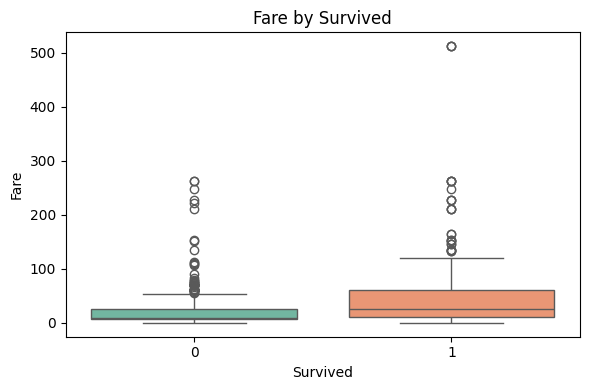

In [ ]:
categorical_and_fare(titanic_df, 'Survived')

Możemy zaobserwować, że mediana ceny biletu dla osób, które przeżyły jest większa, podobnie jak oba kwadryle, maksimum i minimum, co wyraźnie pokazuje, że cena biletu ma znaczący wpływ na przeżywalność (droższy bilet -> większe szanse przeżycia)

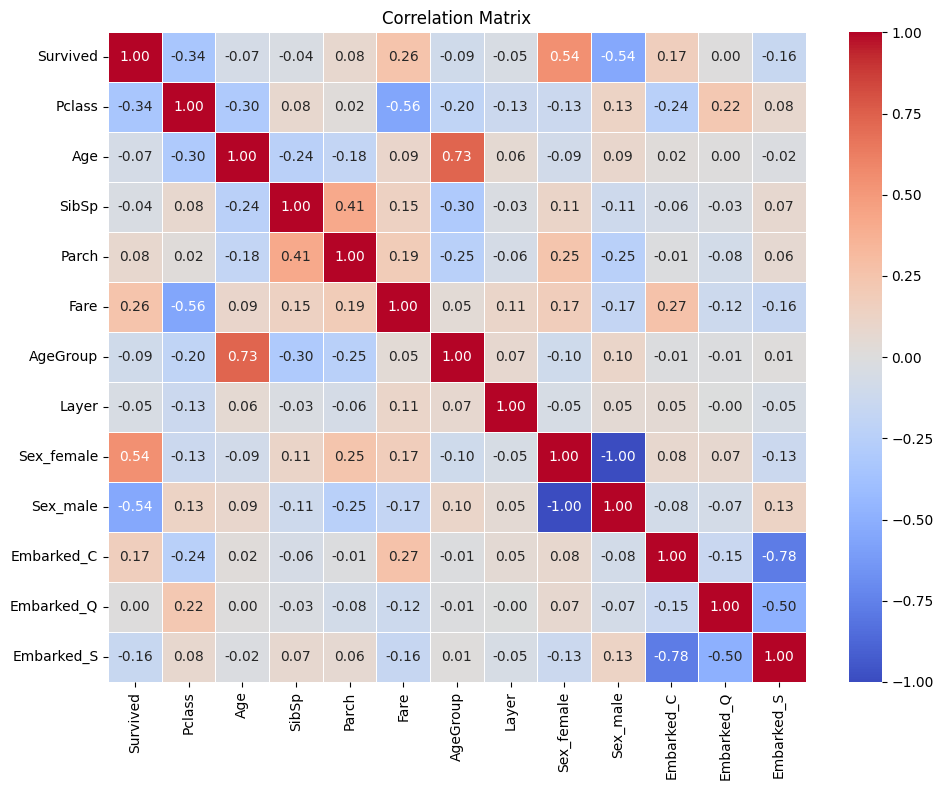

In [ ]:
plot_correlation_matrix(titanic_df)

Z macierzy korelacji możemy zobaczyć, które zmienne są ze sobą powiązane, a szczególnie które wpływają na zmienna predykowaną Survived, czyli przyżycie pasażera Tytanica.

Widzimy bardzo silną dodatnią korelacje przeżywalności (Survived) dla kobiet (Sex_female). Również zauważalne, ale nie aż tak silna dodatnia korelacja przeżywalności występuje dla ceny biletu (Fare) (wyższa cena -> większa szansa na przyżycie) oraz dla osób wsiadających w Cherbourgu (Embarked_C). O ile ceny i płci się spodziewałem, to port, w którym wsiadał pasażer to odkrycie dość zaskakujące.

 Silną korelacje ujemną przeżywalności obserwujemy dla mężczyzn (Sex_male) oraz dla klasy podróży (Pclass) (wyższy numer klasy, czyli "gorsza klasa" -> mniejsza szansa na przeżycie). Możemy również zauważyć, że osoby odpływające z Southampton (Embarked_S) również miały zauważalnie mniejsze szanse przeżycia podobnie jak dzieci (AgeGroup) (Silnej jest to widoczne w AgeGroup niż Age).

 Zatem gratulujemy wszystkim młodym chłopakom z I klasy wypływających z Cherbourgu, których rodzice słono zapłacili za bilety oraz najlepiej nie mają rodzeństwa, a ich kabina znajdowała się na niskim poziomie (?ciekawe?).

 Nie wiem gdzie można wyznaczyć granicę że dana kategoria przestaje mieć wpływ na drugą dlatego wszystkie wartośći poniżej 0.1 uznaje za mało znaczące na ten moment.